In [21]:
import numpy as np
import pandas as pd
import polars as pl

import plotnine as pn
import plotly.express as px
import altair as alt
from matplotlib import pyplot as plt
import seaborn as sns

In [22]:
iris = pl.DataFrame(px.data.iris()).lazy()

In [23]:
iris.fetch(3)

sepal_length,sepal_width,petal_length,petal_width,species,species_id
f64,f64,f64,f64,str,i64
5.1,3.5,1.4,0.2,"""setosa""",1
4.9,3.0,1.4,0.2,"""setosa""",1
4.7,3.2,1.3,0.2,"""setosa""",1


In [27]:
iris\
    .groupby('species')\
    .agg(pl.mean('petal_length'))\
    .collect()

species,petal_length
str,f64
"""versicolor""",4.26
"""setosa""",1.464
"""virginica""",5.552


In [28]:
iris.select(pl.col('species_id')).unique().collect()

species_id
i64
1
2
3


In [29]:
iris\
    .select(
        pl.when(
            pl.col('species_id') == 1)
            .then('One')
            .otherwise(pl.when(
                pl.col('species_id') == 2)
                .then('Two')
                .otherwise('Three')
                ).alias('Cat')
        ).collect()

Cat
str
"""One"""
"""One"""
"""One"""
"""One"""
"""One"""
"""One"""
"""One"""
"""One"""
"""One"""


In [30]:
iris.with_columns(
    pl.when(
            pl.col('species_id') == 1)
            .then('One')
            .otherwise(pl.when(
                pl.col('species_id') == 2)
                .then('Two')
                .otherwise('Three')
                ).alias('Cat')
).collect()

sepal_length,sepal_width,petal_length,petal_width,species,species_id,Cat
f64,f64,f64,f64,str,i64,str
5.1,3.5,1.4,0.2,"""setosa""",1,"""One"""
4.9,3.0,1.4,0.2,"""setosa""",1,"""One"""
4.7,3.2,1.3,0.2,"""setosa""",1,"""One"""
4.6,3.1,1.5,0.2,"""setosa""",1,"""One"""
5.0,3.6,1.4,0.2,"""setosa""",1,"""One"""
5.4,3.9,1.7,0.4,"""setosa""",1,"""One"""
4.6,3.4,1.4,0.3,"""setosa""",1,"""One"""
5.0,3.4,1.5,0.2,"""setosa""",1,"""One"""
4.4,2.9,1.4,0.2,"""setosa""",1,"""One"""


In [36]:
iris.with_columns(
    pl.when(
            pl.col('species_id') == 1)
            .then('One')
            .otherwise(pl.when(
                pl.col('species_id') == 2)
                .then('Two')
                .otherwise('Three')
                ).alias('Cat')
).groupby(['species', 'Cat'])\
    .agg([pl.count('species').alias('count'), pl.mean('petal_length').alias('average')])\
    .sort(pl.col('average'), reverse = True)\
    .collect()

species,Cat,count,average
str,str,u32,f64
"""virginica""","""Three""",50,5.552
"""versicolor""","""Two""",50,4.26
"""setosa""","""One""",50,1.464


In [38]:
iris.with_columns(
    pl.when(
            pl.col('species_id') == 1)
            .then('One')
            .otherwise(pl.when(
                pl.col('species_id') == 2)
                .then('Two')
                .otherwise('Three')
                ).alias('Cat')
).groupby(['species', 'Cat'])\
    .agg([pl.count('species').alias('count'), pl.mean('petal_length').alias('average')])\
    .sort(pl.col('average'), reverse = True)\
    .select([pl.col('species'), pl.col('average')])\
    .collect()\
    .to_pandas()

,species,average
0,virginica,5.552
1,versicolor,4.260
2,setosa,1.464


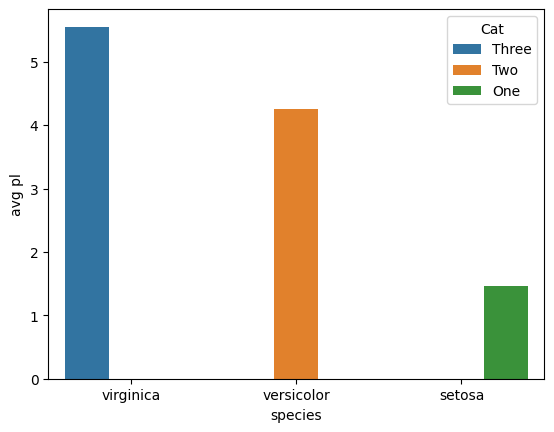

In [54]:
df = iris.with_columns(
    pl.when(
            pl.col('species_id') == 1)
            .then('One')
            .otherwise(pl.when(
                pl.col('species_id') == 2)
                .then('Two')
                .otherwise('Three')
                ).alias('Cat')
).groupby(['species', 'Cat'])\
    .agg([pl.count('species').alias('count'), pl.mean('petal_length').alias('avg pl'), pl.mean('petal_width').alias('avg pw')])\
    .sort(pl.col('avg pl'), reverse = True)\
    .select([pl.col('species'), pl.col('avg pl'), pl.col('Cat')])\
    .collect()\
    .to_pandas()

sns.barplot(data = df, x = 'species', y = 'avg pl', hue = 'Cat');

<AxesSubplot: >

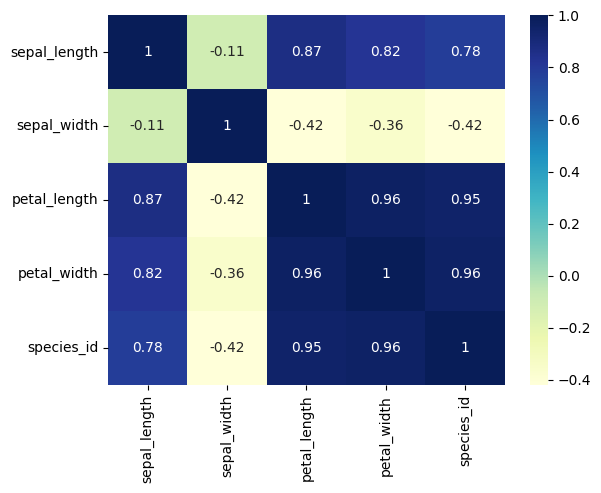

In [46]:
sns.heatmap(iris.collect().to_pandas().corr(), annot = True, cmap = 'YlGnBu')

In [56]:
df = iris.select([pl.col('species'), pl.col('petal_length')]).collect().to_pandas()

<AxesSubplot: xlabel='species', ylabel='petal_length'>

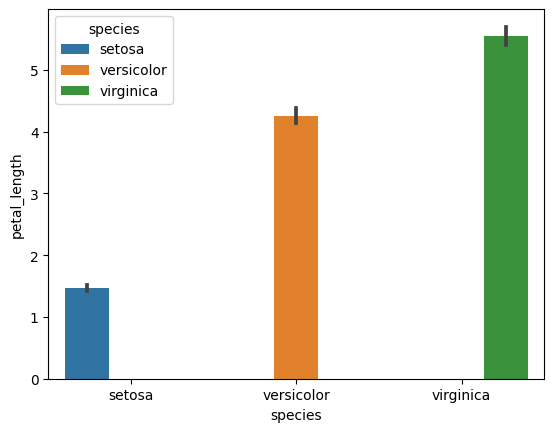

In [57]:
sns.barplot(data = df, x = 'species', y = 'petal_length', hue = 'species', estimator = 'mean')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=57d5770d-d68f-47c5-bc32-65c81e0e368b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>